# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import set_config
set_config(transform_output='pandas')

# Load data

In [2]:
data = "Data/cust_seg.csv"
df = pd.read_csv(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Calling value_counts on defaulted, only 700 non_null count and will check for duplicated

In [3]:
df['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [4]:
df.duplicated().sum()

0

Droping null values

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       700 non-null    int64  
 1   Customer Id      700 non-null    int64  
 2   Age              700 non-null    int64  
 3   Edu              700 non-null    int64  
 4   Years Employed   700 non-null    int64  
 5   Income           700 non-null    int64  
 6   Card Debt        700 non-null    float64
 7   Other Debt       700 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 60.2 KB


All numeric values (int/float) calling describe to get over all view

In [6]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,429.461429,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,243.323524,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,0.000000,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,221.750000,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,432.500000,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,641.250000,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,849.000000,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


Income, card debt, and other debt looks to have some outliers but, but feel values are possible.  Also realize unamed:0 and Customer id may be be index, will drop both column

In [7]:
df = df.drop(['Unnamed: 0', 'Customer Id'],axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


Going to add card debt and other debt to create new column total debt

In [8]:
df['Total Debt'] = df['Card Debt'] = df['Other Debt']
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt
0,41,2,6,19,1.073,1.073,0.0,6.3,1.073
1,47,1,26,100,8.218,8.218,0.0,12.8,8.218
2,33,2,10,57,5.802,5.802,1.0,20.9,5.802
3,29,2,4,19,0.516,0.516,0.0,6.3,0.516
4,47,1,31,253,8.908,8.908,0.0,7.2,8.908


In [9]:
#df = df.drop(columns=['Card Debt', 'Other Debt'])
#df.head()

# Scaling

In [10]:
scale = StandardScaler()
scaled_df = scale.fit_transform(df)
scaled_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt
0,0.768304,0.298793,-0.359007,-0.723102,-0.604284,-0.604284,-0.594950,-0.580528,-0.604284
1,1.519090,-0.779325,2.647029,1.478707,1.570620,1.570620,-0.594950,0.372222,1.570620
2,-0.232744,0.298793,0.242201,0.309845,0.835201,0.835201,1.680814,1.559495,0.835201
3,-0.733267,0.298793,-0.659610,-0.723102,-0.773833,-0.773833,-0.594950,-0.580528,-0.773833
4,1.519090,-0.779325,3.398538,5.637681,1.780653,1.780653,-0.594950,-0.448609,1.780653
...,...,...,...,...,...,...,...,...,...
844,0.768304,-0.779325,-0.208705,-0.070714,-0.566235,-0.566235,-0.594950,-0.859025,-0.566235
846,-0.858398,0.298793,-0.208705,-0.315360,-0.315718,-0.315718,-0.594950,-0.477925,-0.315718
847,-1.233791,2.455029,-1.260817,-0.750285,0.046209,0.046209,1.680814,3.391707,0.046209
848,-0.357875,-0.779325,0.542804,-0.478457,-0.719041,-0.719041,-0.594950,-1.078890,-0.719041


# Inertias

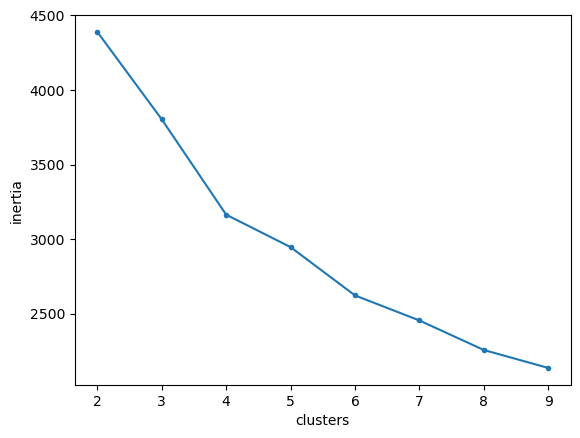

In [11]:
#Create an empty list of inertias
inertias = []
#Loop trhough k values betwen 2 and 10 and store the inertias in the list
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize score
plt.plot(range(2,10), inertias, marker ='.')
plt.xlabel('clusters')
plt.ylabel('inertia');


looks like 3 clusters but may have too many features to clearly visulize clusters

# Silhouette

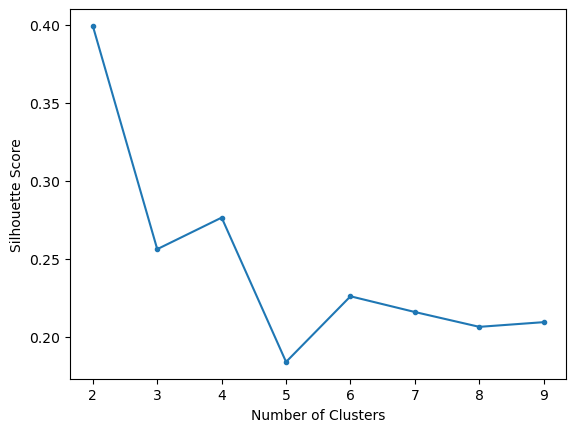

In [12]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 10), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');



2 had higest silhouette score follow by 3 but an increas in score at 6 also.  Going to graph 2 and 3

In [13]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans3 = KMeans(n_clusters = 3, random_state=42)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

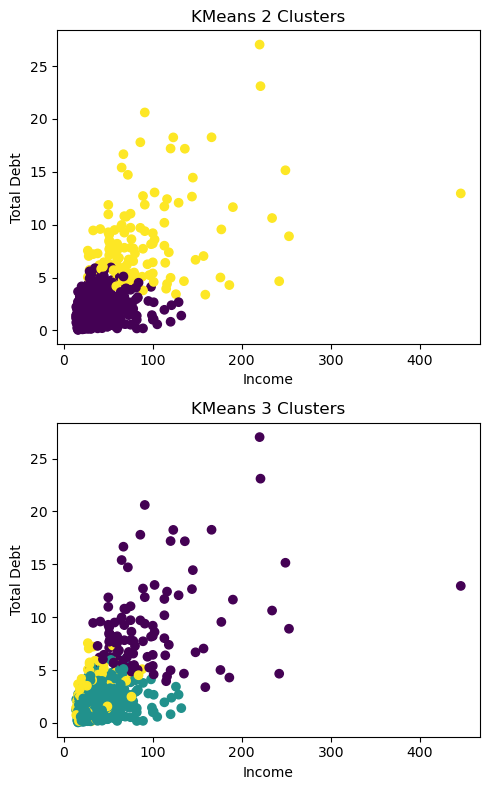

In [14]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['Total Debt'], c = df['cluster2'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Total Debt')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Income'], df['Total Debt'], c = df['cluster3'])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Total Debt')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

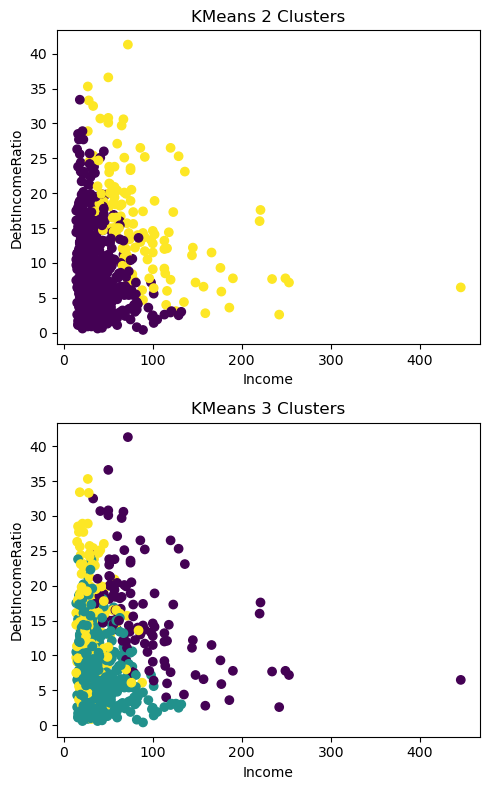

In [15]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster2'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('DebtIncomeRatio')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster3'])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('DebtIncomeRatio')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

In [16]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt,cluster2,cluster3,cluster
0,41,2,6,19,1.073,1.073,0.0,6.3,1.073,0,1,1
1,47,1,26,100,8.218,8.218,0.0,12.8,8.218,1,0,0
2,33,2,10,57,5.802,5.802,1.0,20.9,5.802,1,2,0
3,29,2,4,19,0.516,0.516,0.0,6.3,0.516,0,1,1
4,47,1,31,253,8.908,8.908,0.0,7.2,8.908,1,0,0


In [17]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Total Debt,cluster2,cluster3
0,0,41.699248,2.007519,15.075188,89.172932,8.289180,8.289180,0.315789,16.277444,8.289180,0.947368,0.323308
1,1,33.255732,1.656085,6.820106,35.380952,1.831175,1.831175,0.248677,8.849206,1.831175,0.000000,1.257496


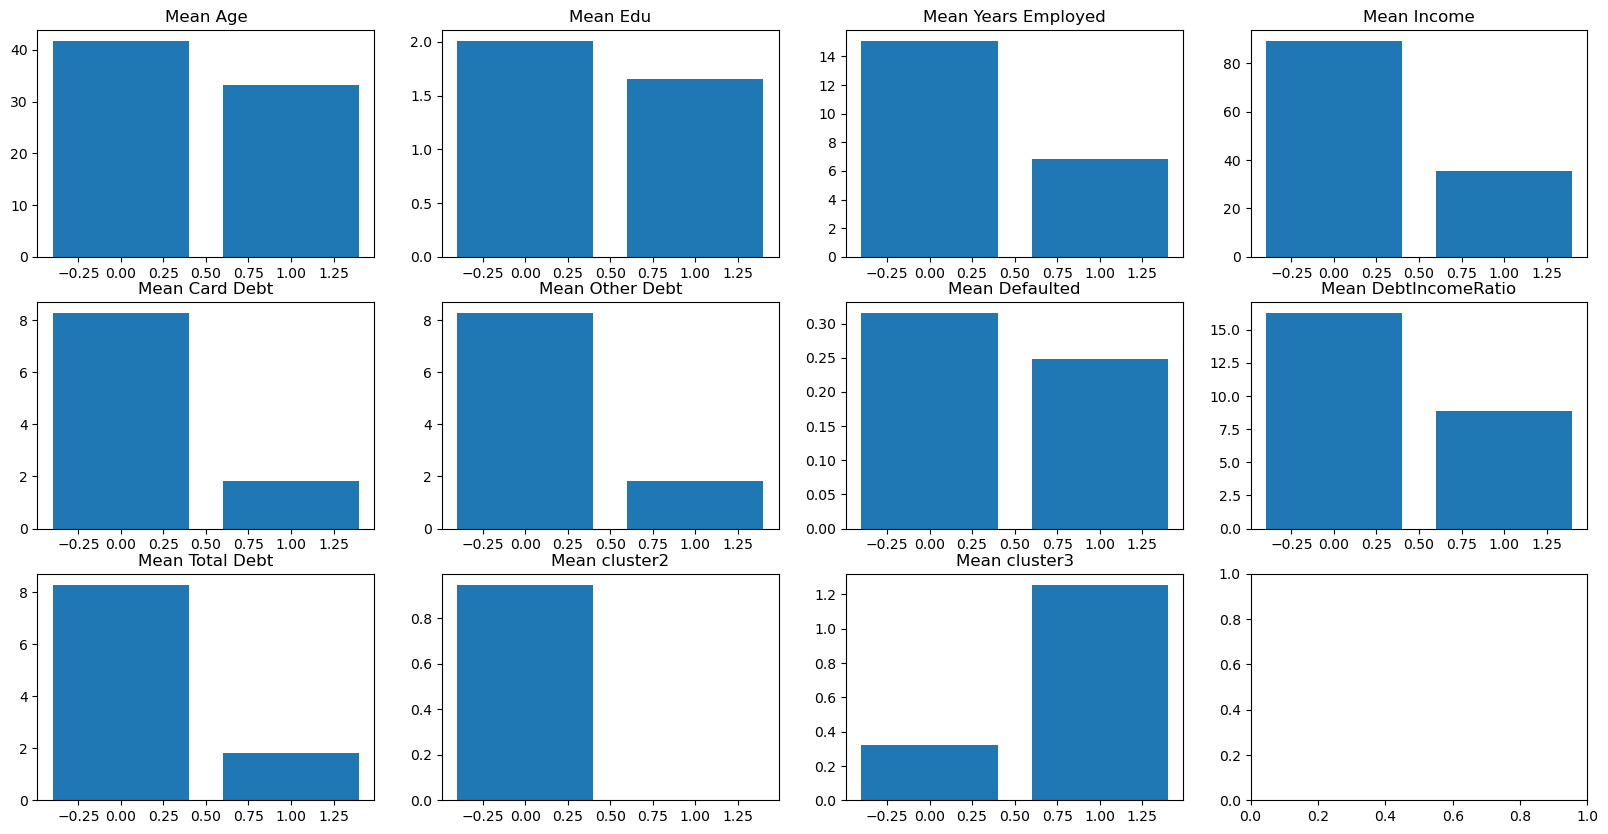

In [18]:
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')



Cluster 0 has among other things, a higher overall debt, almost 4 times the debt.  Overall income is a little over double.  Average age is 40 with 14 years average employment.  Even with 30% defaulting they seem to be the a stable group to have our credit cards invested.

Cluster 1 has only about 25% debt as cluster 0.  With an average age a little over 30 and their avg income less then half of cluster 0 this may be the target group.  People around this age will be possible raising children or starting to have a family.  With infaltion is full bloom the need for a credit card to cover end of the months expences would be needed.  Current default rates a 5% lower that of cluster 0 however future debt has not been condcidered in this feature.  